# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The Smarcab does not move within each simulation. Towards the top of the game, it reads: Agent not enforced to meet deadline. This is probably the reason for it not moving; it may not have any incentive to go anywhere. It appears to start at a random location for each training trial, but never moves beyond that. The driver receives positive rewards only when the light in front of it turns red. Since the car doesn't move at all, it is rewarded positively for doing so when that happens to be the appropriate action to take. When the light changes to green, the rewards then become negative because the car doesn't move. The rewards are between -10 and 10.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

In agent.py, 'enforce_deadline' when set to True, enforces a deadline metric for the driver. 'learning' forces the driving agent to use Q-learning. 'grid_size' changes the number of intersections(columns and rows).

In environment.py, the act() class function is called when an agent performs an action.

In simulator.py, the difference between 'render_text()' and 'render()' is where/what is displayed. render_text() displays the simulated trial in the terminal/command prompt. render() displays the simulation in the GUI (so you can see the cars, light color, and grid).

In planner.py, next_waypoint() checks East-West direction first.



-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


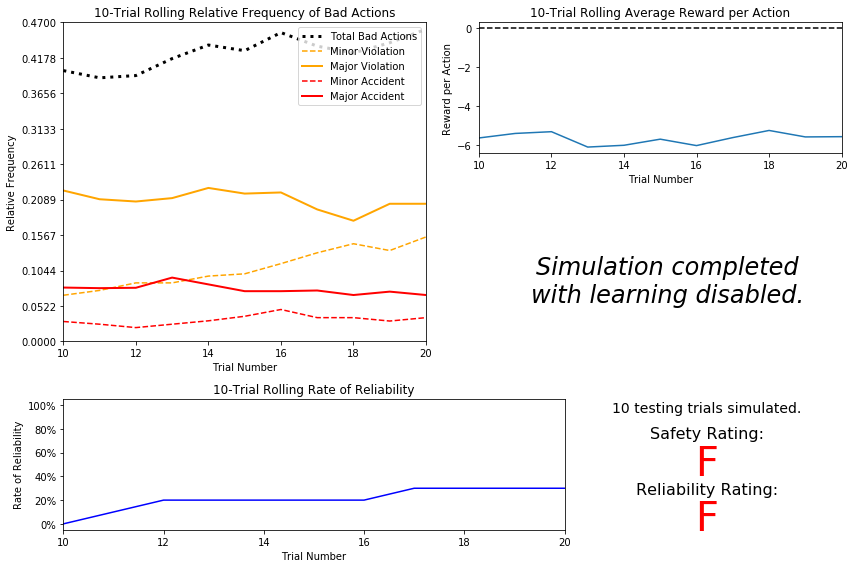

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The driving agent made bad actions approximately 40% of the time. Nearly half of those bad actions are major violations. 5% of the actions led to major accidents. Minor accidents occurred slightly more frequently than major accidents. Minor  violations occurred approximately 10% of the time.

The average reward per action is approximately -5. This value fluctuated up and down, without any real pattern of improvement. This is to be expected as the simulation was completed without learning enabled.

The Reliability remained at 0%, without fluctuation, which is sensible because the likelihood of a car taking a random walk and managing to get to a particular destination is slim.

0% Reliability yielded a Reliability Rating of F and the frequency of violations/accidents from this simulation yielded a Safety Rating of F. Without ever reaching the destination, there is no way this Smartcab could be considered reliable. It also could not be considered safe. The average car accident occurs once per 165,000 miles of driving. For this Smartcab to be comparable to that kind of average, the scale of this grid would be enormous. Each grid segment would need to be in the neighborhood of twice the circumference of the Earth. There is only one car driving on that kind of scale, Elon Musk's Tesla Roadster. Since the Smartcab is white, not red, I know I'm not simulating a car launched into space.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

The 'light' input is important for both safety and efficiency. Efficiency depends on the Smartcab knowing when the light is green. Safety depends on the Smartcab knowing when the light is red. The 'light' feature will be used to decide when the car should go.

'left' and 'oncoming' are more relevant to safety. These features will be used to determine if it is safe to proceed in that direction. 'right' is not needed because the agent would not collide into the car to its right in the intersection. Only 'left' or 'oncoming' has potential for collision.

'deadline' may not be needed as a state feature. It can be used to calculate efficiency later on, but I don't think it is neccessary for making a decision and will make the size of the statespace much larger.

'waypoint' affects the efficiency rating. 'deadline' will be used for calculating efficiency, whereas 'waypoint' will be used to give overall direction to the Smartcab.

These are appropriate features for modeling the Smartcab in the environment, because they give the Smartcab enough information to know where it needs to go, how long it has to get there, and whether or not it could crash into another car.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

In [3]:
waypoint = 3
light = 2
left = 4
right = 4
oncoming = 4
deadline = 15 # estimate
statespace_deadline = waypoint * light * left * right * oncoming * deadline
statespace_nodeadline = waypoint * light * left * right * oncoming
print statespace_deadline
print statespace_nodeadline
steps = 20
trials = 20
tested_states = steps * trials
print tested_states
print 100. * tested_states / statespace_deadline
print 100. * tested_states / statespace_nodeadline

5760
384
400
6.94444444444
104.166666667


**Answer:**

I estimate the size of the statespace both with and without the deadline feature. With the deadline feature, the size of the statespace is estimated to be 5760, while without the deadline feature, it would be 384. This means that in 20, 20-step, trials, less than 10% of the states could be seen, using the deadline feature. Without using the deadline feature, it would be more feasible for all states to be seen/explored, even if a few more trials were neccessary to help with the chance of repeated states. Removing 'deadline' from the features list may be smart so that the statespace can be more completely explored/learned over.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

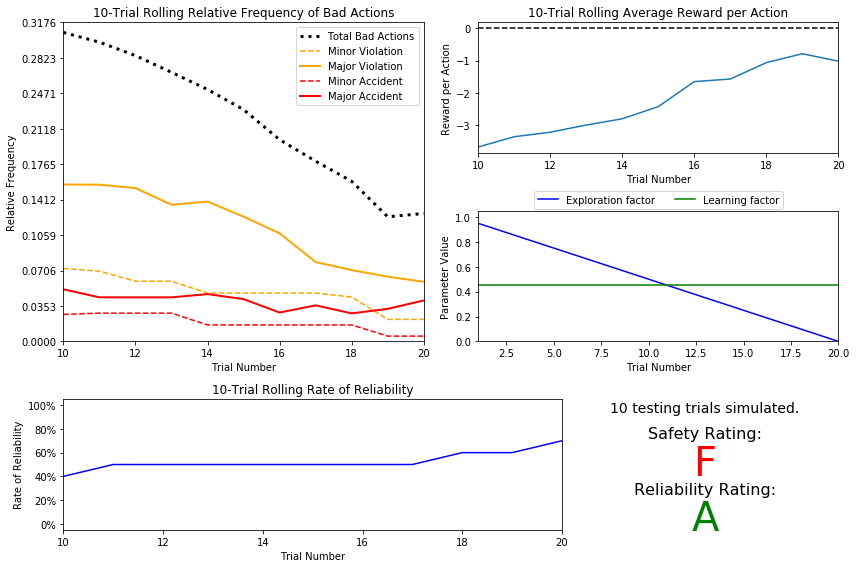

In [111]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
The basic driving agent and the default Q-Learning agent both perform poorly in safety. Neither could be considered safe. The default Q-Learning agent, however, manages to have improving trends on both safety and reliability. The reliability for the default learner is good.

Initially, the agent makes bad decisions about 31% of the time, but by the end of the learning trials, the agents bad decision frequency is below 15%. The 10-trial rolling average of reward per action increased by nearly 3(-4 to -1) from beginning to end of learning. Looking at the logs, *net_reward* had an overall, loose, positive correlation with trial number. R^2 value was approximately 0.2. The safety rating has not improved; it remains an F.

Since the agent isn't tuned at all, it makes sense that it is not performing optimally just yet. It is better than when decisions were purely random, but it still has trouble getting choosing bad actions.

It took about 20 trials of learning before testing. This makes sense given epsilon is decremented, each trial, by 0.05 from 1 with an epsilon tolerance of 0.05.

The decaying function for $\epsilon$ (the exploration factor) is accurately represented in the parameters panel. After each trial, the value of $\epsilon$ is 0.05 less than the previous iteration.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

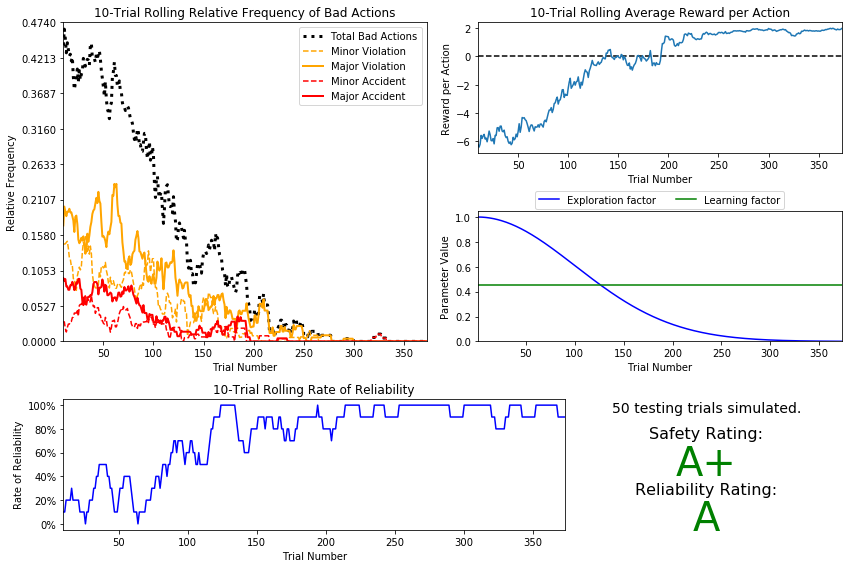

In [115]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
I used $\epsilon = e^{-kt}$ decay function for epsilon. This provided an easy tuning parameter k to affect how quickly the agent finished the learning trials. With k = 0.0001 and tolerance=0.001, it took about 350 trials before testing. I saw good results with an alpha between 0.4 and 0.5, so I chose 0.45 and tested multiple times. I chose k=0.0001 and tolerance=0.001 so that the number of trials would be high enough such that during the learning trials the Total Bad Actions frequency would be at or under 1%.

The reliability stayed about the same, but there was an incredible improvement in safety, going from F to A+

I think with all A's, it is safe to say that the Q-Learner did in fact successfully learn an appropriate policy. I am satisfied with the safety and reliability ratings.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

### Answer:

#### 'state' table

| State Feature | Description                                                  |
|:--------------|-------------------------------------------------------------:|
| 'light'       | Color of stoplight                                           |
| 'left'        | Intended direction of travel for car on the agent's left     |
| 'oncoming     | Intended direction of travel for car across the intersection |
| waypoint      | Direction the agent should move to proceed towards finish    |

#### optimal policy tables

| waypoint = left    | 'left' values: | 'left'    | 'forward' | 'right'   | 'none'    |
|--------------------|----------------|-----------|-----------|-----------|-----------|
| 'oncoming' values: |                |           |           |           |           |
| 'left'             |                | 'left'    | 'left'    | 'left'    | 'left'    |
| 'forward'          |                | 'forward' | 'forward' | 'forward' | 'forward' |
| 'right'            |                | 'forward' | 'forward' | 'forward' | 'forward' |
| 'none'             |                | 'left'    | 'left'    | 'left'    | 'left'    |

| waypoint = forward | 'left' values: | 'left'    | 'forward' | 'right'   | 'none'    |
|--------------------|----------------|-----------|-----------|-----------|-----------|
| 'oncoming' values: |                |           |           |           |           |
| 'left'             |                | 'forward' | 'forward' | 'forward' | 'forward' |
| 'forward'          |                | 'forward' | 'forward' | 'forward' | 'forward' |
| 'right'            |                | 'forward' | 'forward' | 'forward' | 'forward' |
| 'none'             |                | 'forward' | 'forward' | 'forward' | 'forward' |

| waypoint = right   | 'left' values: | 'left'    | 'forward' | 'right'   | 'none'    |
|--------------------|----------------|-----------|-----------|-----------|-----------|
| 'oncoming' values: |                |           |           |           |           |
| 'left'             |                | 'right'   | 'right'   | 'right'   | 'right'   |
| 'forward'          |                | 'right'   | 'right'   | 'right'   | 'right'   |
| 'right'            |                | 'right'   | 'right'   | 'right'   | 'right'   |
| 'none '            |                | 'right'   | 'right'   | 'right'   | 'right'   |

1. The optimal policy for red light states is a little simpler. If the light is red, the optimal action is 'none'. The few exceptions to this rule are some righthand turns with a red light. This is allowed unless there is a car to the left that is going to move 'forward'. Essentially, the agent is not moving during red lights unless there are acceptable right turn conditions and not choosing actions that collide with another vehicle if they have the right of way. In addition, the action that is more similar to 'waypoint' is chosen if the 'waypoint' action isn't available. This means if the 'waypoint' feature says right, going 'forward' is preferable than going 'left'. The (green, right, left) state should optimally go forward (to then take a left at the next intersection), however, in the Q-table, I see a slightly higher reward for turning right.

2. The policy is correct for almost all of the states. Occasionally there are instances where an action other than the optimal action has a higher Q value. The margin between the optimal action and the action with the highest Q is quite small. I don't see any instances where a completely wrong action is learned as the optimal action.

3. Examples from the recorded Q-table:

#### Example States with Q values ('light', 'oncoming', 'waypoint')

|('green', 'forward', 'left', 'right') |('red', None, 'right', 'right')|('green', 'forward', 'left', 'left')|
|----------------------|------------------------|-------------------------|
| forward : 0.11      | forward : -8.70         | forward : 0.59          |
| right : 1.84        | right : 2.33            | right : 0.60            |
| None : 0.00         | None : 0.75             | None : -4.40            |
| left : 0.23         | left : -33.34           | left : 1.73             |

- In the first example, the light is green and the car is supposed to turn right to get to the destination. In this case, the agent has the right of way, so it is optimal to turn right.

- In the second example, the 'waypoint' feature suggests the car should go right in order to reach the destination. This is a case where a right on red is okay, because there is no car to the left.

- In the third example, the agent has the right of way to make a left turn because there is no oncoming traffic making a right or going forward. Since 'waypoint' wants the car to move left, that is the optimal action.

4. The (green, right, left, forward) state should optimally go forward, however, in the Q-table, I see a slightly higher reward for turning left. This may have happened from the exploration resulting in randomly moving right enough for the value to rise above the optimal 'forward' value. Additionally, there is some information lost by not keeping track of certain features like 'right'. It is possible for a car that wasn't part of the agent's state to affect the reward the agent receives.

|('green', 'right', 'left', 'forward')|
|--------------------------|
| forward : 0.00           |
| right : -0.18            |
| None : -3.59             |
| left : 1.53              |


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Environment: Since the environment is randomly generated, it wouldn't be possible to know what future states coupld provide higher rewards.

Agent: Since the destination is randomly generated, the agent may learn an affinity to particular starting locations and destinations. This would be kind of like over-fitting.

From reviewer:
There are two issues with the way the smartcab and environment are designed that makes the use of gamma ineffective or detrimental to the Q-learning algorithm. For the smartcab itself, we note that it has only an egocentric view of the world, and hence has no context regarding its distance from the goal. A smartcab that is 5 intersections away from the destination, and a smartcab that is 1 intersection away from the destination both have the same understanding of state (perhaps with the exception of deadline, but that does not aid in understanding distance from the goal). Hence, it’s impossible to propagate rewards away from the goal towards specific high-value states since it’s unclear which states represent “closeness” to the goal.

The second issue is that the destination itself moves after every trial. If the smartcab had a localized view of the environment, and we attempted to propagate reward away from the goal, we would eventually (given enough trials), propagate reward away from every intersection, and hence would effectively not be making use of knowing where the goal is at all.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.